In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [3]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [4]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/ALK&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

In [5]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/ALK&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 50))

### EU Average of DIC

In [6]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [7]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [8]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [9]:
data_baseline_plot = (data_baseline.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataset(name='DIC')
data_oae_plot = (data_oae.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataset(name='DIC')

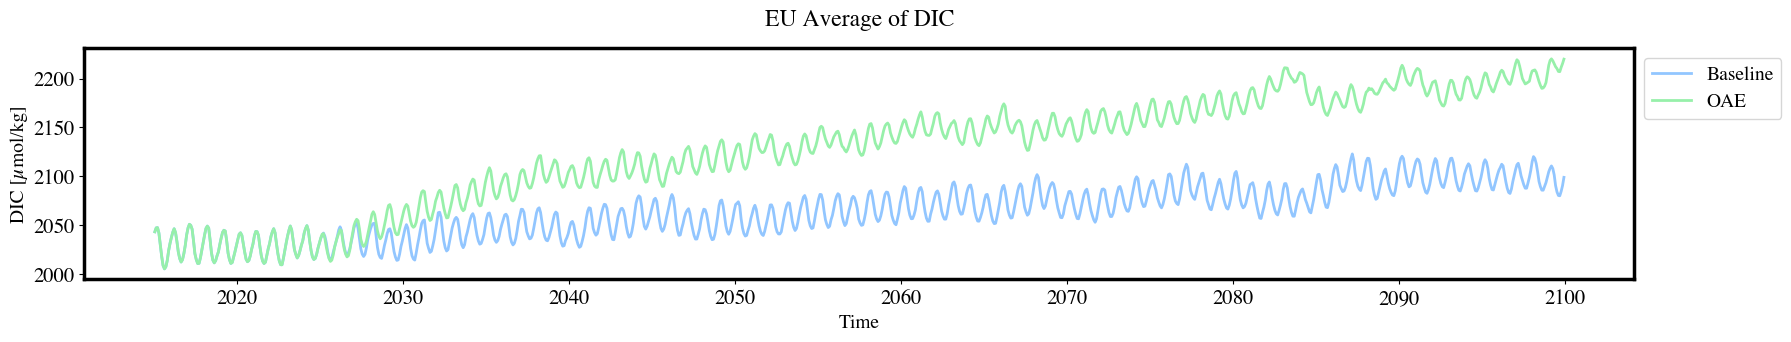

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontname="Times", fontsize=17, y=1.06)
plt.show()

In [11]:
sliced_frame_baseline_plot = (sliced_frame_baseline.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataset(name='DIC')
sliced_frame_oae_plot = (sliced_frame_oae.DIC.mean(dim=('y', 'x', 'deptht'))).to_dataset(name='DIC')

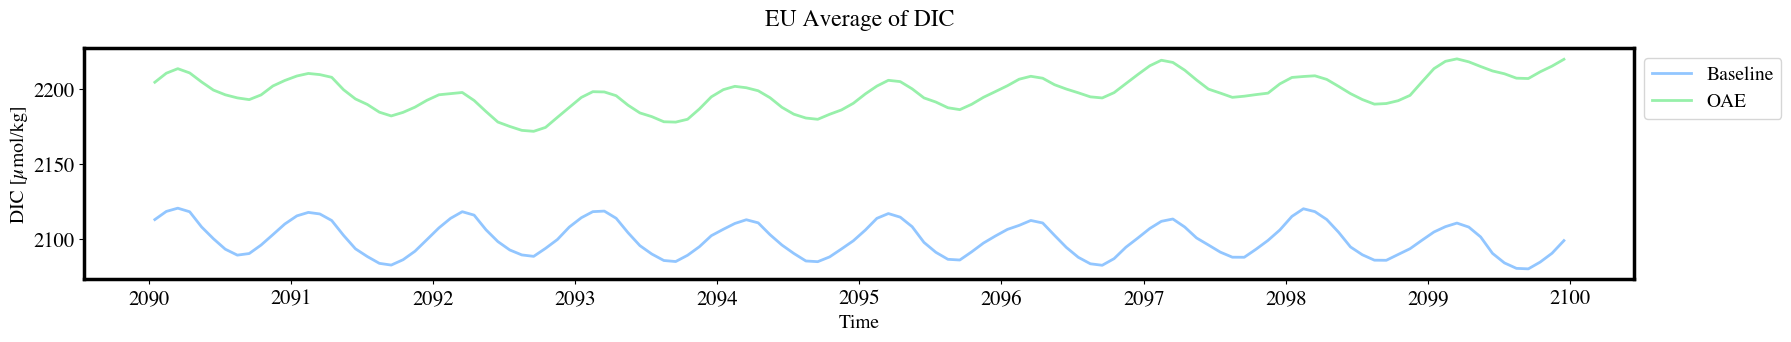

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.DIC, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of DIC

In [13]:
# condition

start_date = "2090-01-01"
end_date = "2100-01-01"

In [14]:
dic_baseline = data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))

In [15]:
dic_seasonal_mean_baseline = (dic_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)).mean(["y", "x", "deptht"])

In [16]:
dic_oae = data_oae["DIC"].sel(time_counter=slice(start_date, end_date))

In [17]:
dic_seasonal_mean_oae = dic_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True).mean(["y", "x", "deptht"])

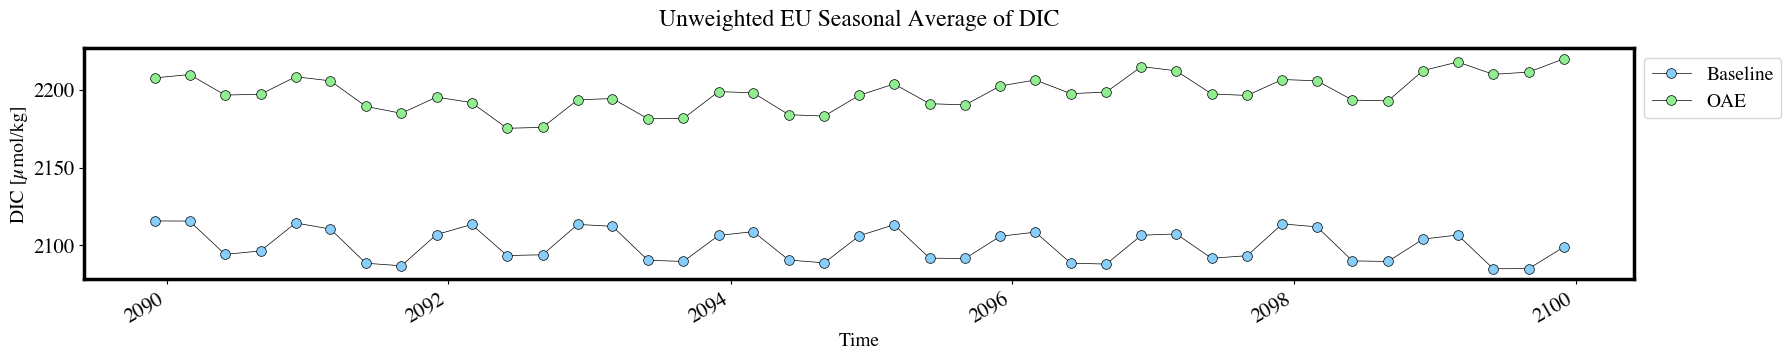

In [18]:
f, ax = plt.subplots(figsize=(20, 3))

dic_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of DIC", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC

In [19]:
month_length_baseline = dic_baseline.time_counter.dt.days_in_month
dic_weighted_mean_baseline = ((dic_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
dic_weighted_season_baseline = (dic_weighted_mean_baseline.where(dic_weighted_mean_baseline)).mean(["y", "x", "deptht"])

In [20]:
month_length_oae = dic_oae.time_counter.dt.days_in_month
dic_weighted_mean_oae = ((dic_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
dic_weighted_season_oae = (dic_weighted_mean_oae.where(dic_weighted_mean_oae)).mean(["y", "x", "deptht"])

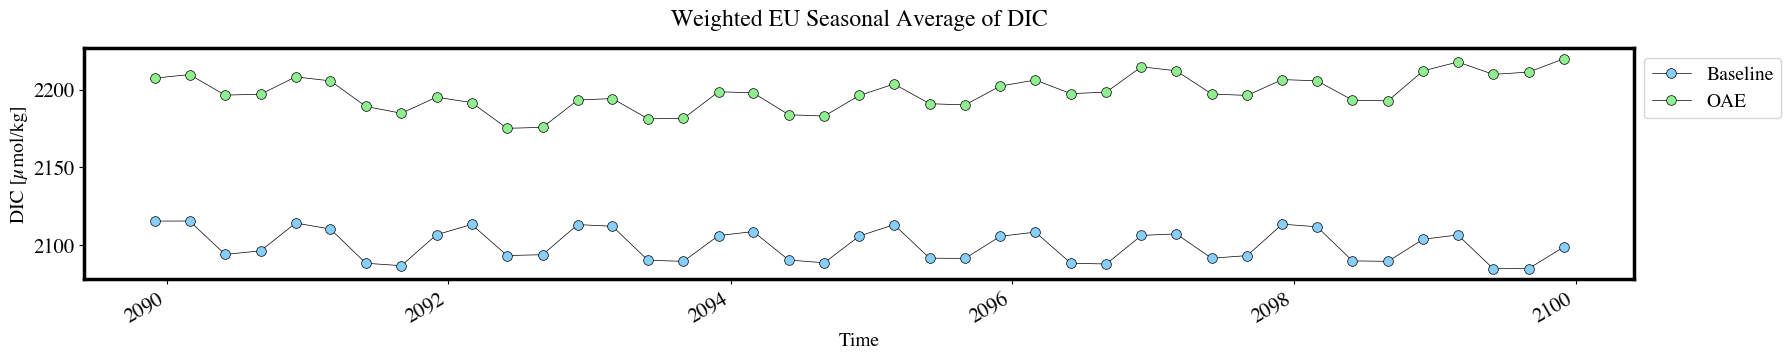

In [21]:
f, ax = plt.subplots(figsize=(20, 3))
dic_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of DIC (seasons displayed)

In [22]:
# condition

colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

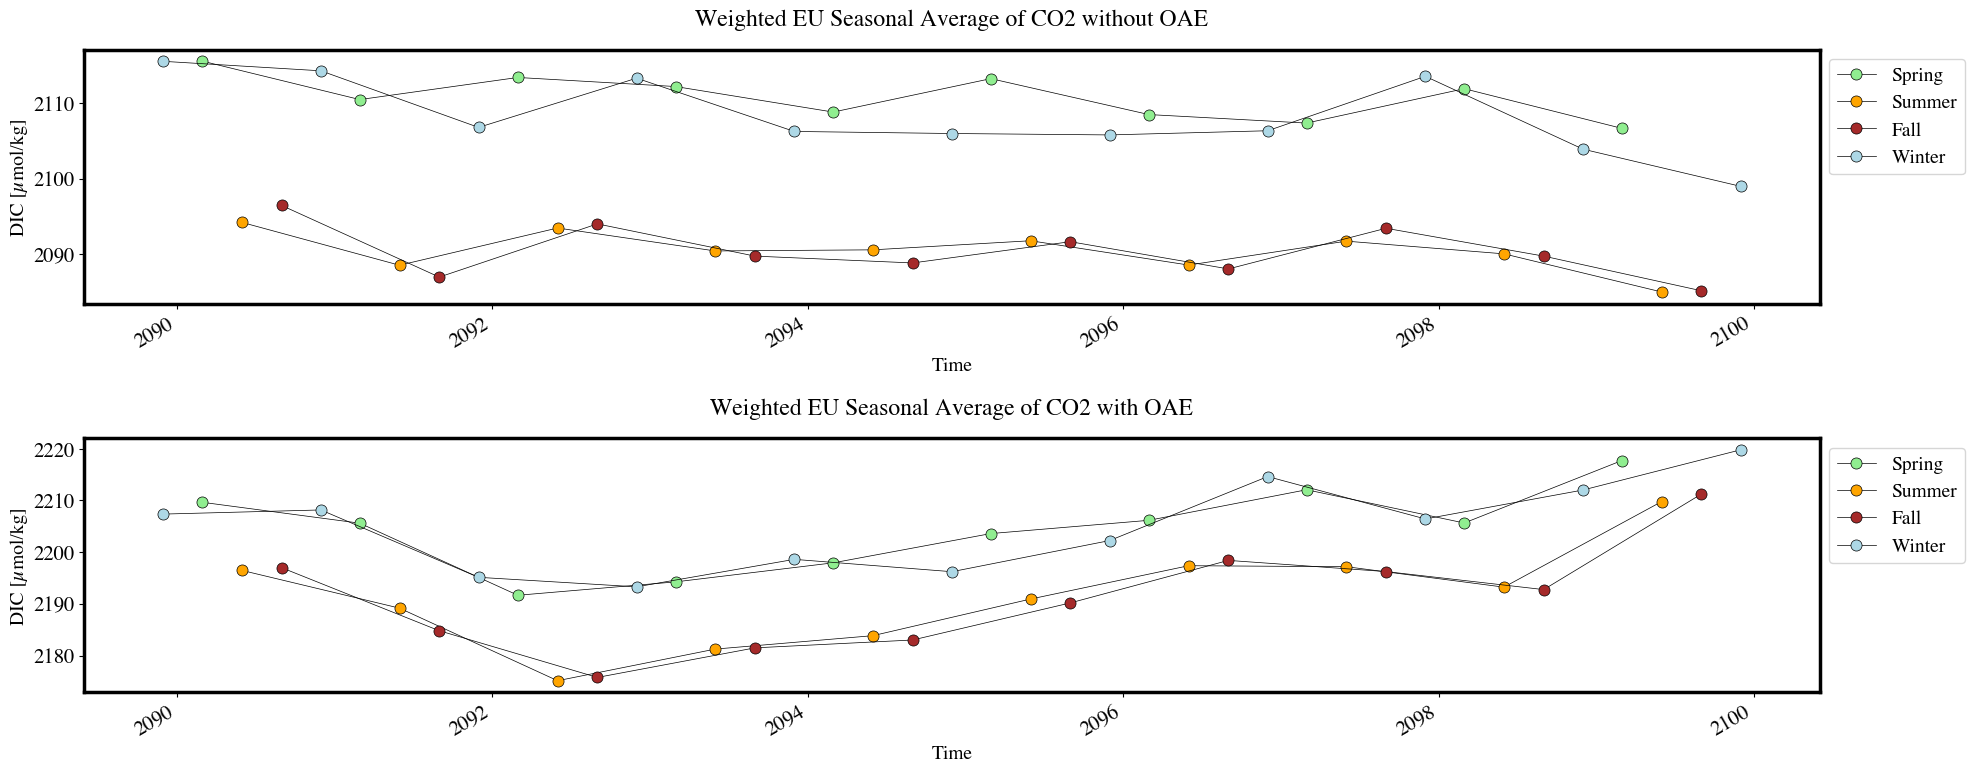

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in dic_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('DIC [µmol/kg]', fontsize=14)

for month, arr in dic_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('DIC [µmol/kg]', fontsize=14)
f.tight_layout()
plt.show()

In [24]:
# define handlers for future legends

In [25]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

### Weighted EU Seasonal Average of DIC without OAE (seasons displayed)

In [26]:
dic_weighted_baseline = dic_weighted_season_baseline.to_dataframe('dic')
dic_weighted_baseline['Month'] = pd.DatetimeIndex(dic_weighted_baseline.index).month

In [27]:
# condition 

conditions_season = [
    (dic_weighted_baseline['Month'] == 3),
    (dic_weighted_baseline['Month'] == 6),
    (dic_weighted_baseline['Month'] == 9),
    (dic_weighted_baseline['Month'] == 12)
]

values_season = ['Spring', 'Summer', 'Fall', 'Winter']

In [28]:
dic_weighted_baseline['Month'] = np.select(conditions_season, values_season)

In [29]:
colors_season = dict(zip(dic_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

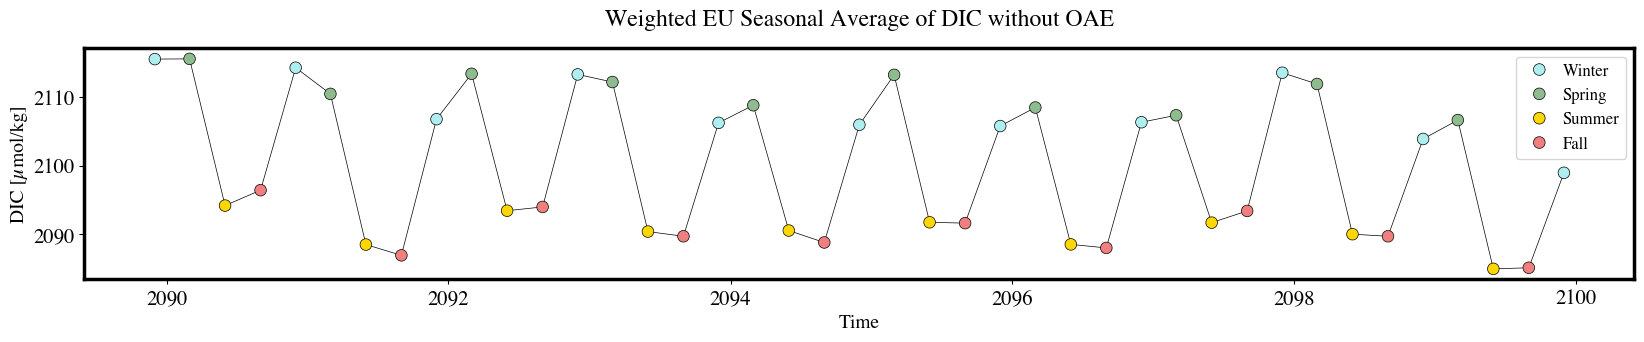

In [30]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.dic, color=dic_weighted_baseline.Month.map(lambda x: colors_season[x]), edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC with OAE (seasons displayed)

In [31]:
dic_weighted_oae = dic_weighted_season_oae.to_dataframe('dic')
dic_weighted_oae['Month'] = pd.DatetimeIndex(dic_weighted_oae.index).month

In [32]:
dic_weighted_oae['Month'] = np.select(conditions_season, values_season)

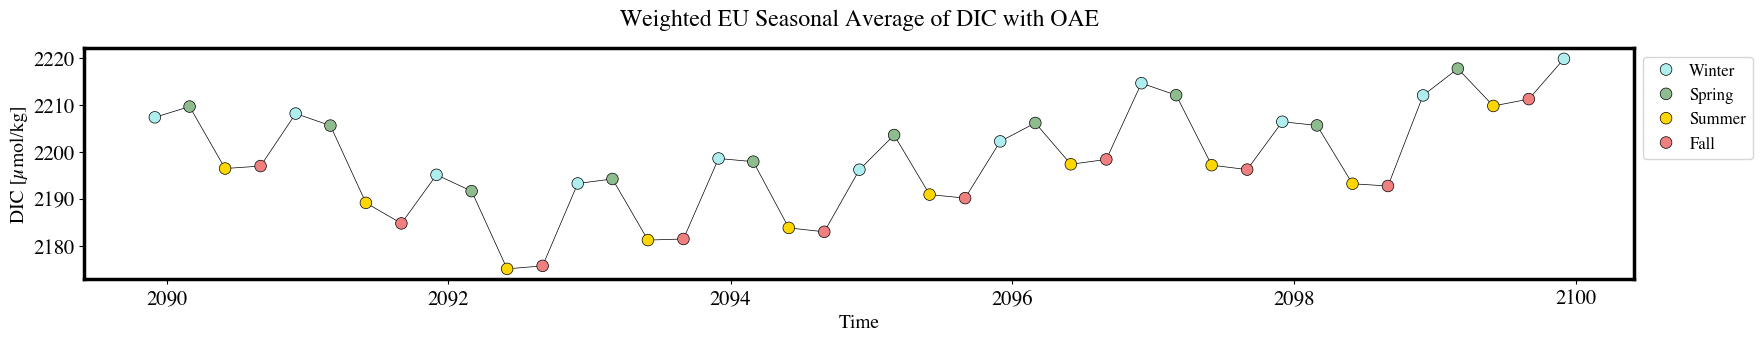

In [33]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.dic, color=dic_weighted_oae.Month.map(lambda x: colors_season[x]), edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of DIC (seasons displayed)

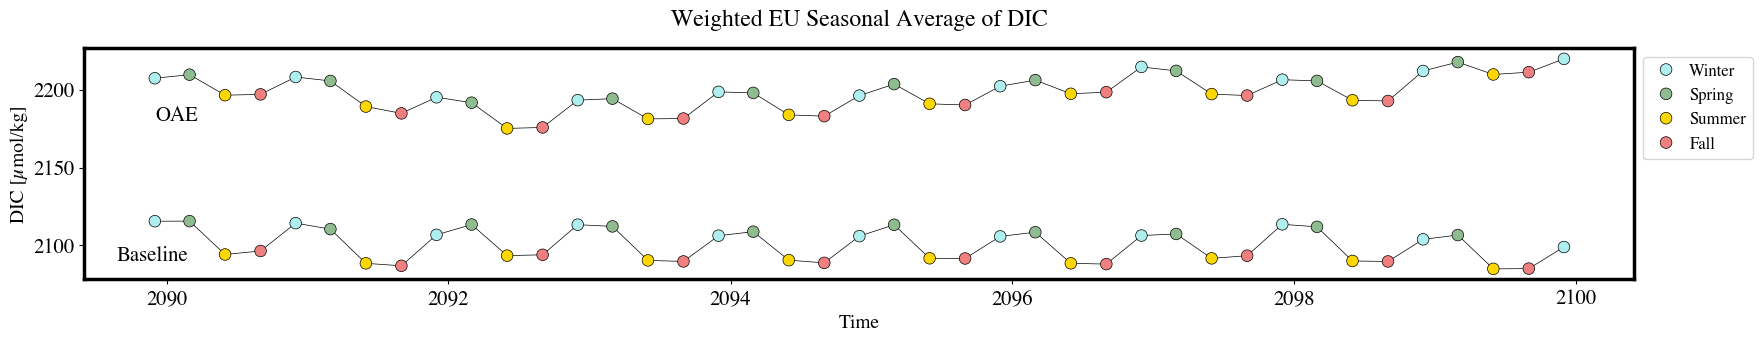

In [34]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_weighted_baseline.index, dic_weighted_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2180, s='OAE')
ax.scatter(dic_weighted_baseline.index, dic_weighted_baseline.dic, color=dic_weighted_baseline.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(dic_weighted_oae.index, dic_weighted_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2090, s='Baseline')
ax.scatter(dic_weighted_oae.index, dic_weighted_oae.dic, color=dic_weighted_oae.Month.map(lambda x: colors_season[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_season.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=12, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of DIC", fontsize=17, y=1.06)

pass

### EU Seasonal Average of DIC from 2090 to 2100 without OAE

In [35]:
sliced_frame_baseline = sliced_frame_baseline.DIC.mean(dim=('deptht'))

In [36]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [37]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [38]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='dic')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='dic')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='dic')

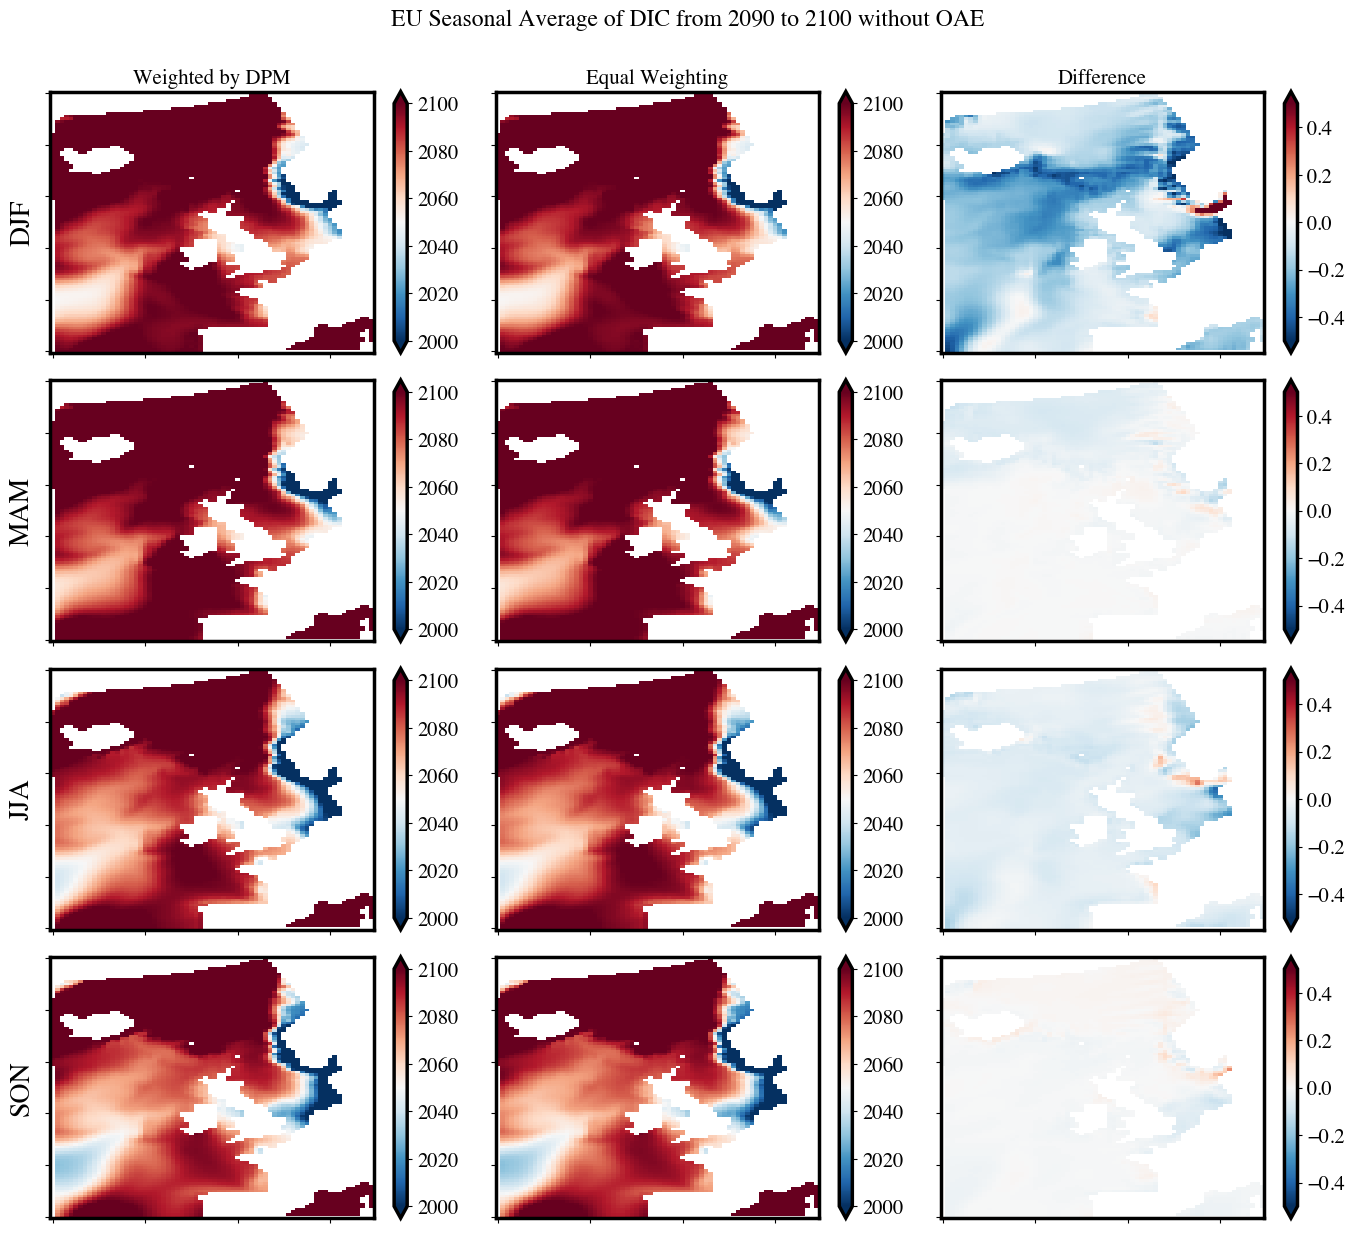

In [39]:
notnull = pd.notnull(ds_unweighted_baseline["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2100,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### EU Seasonal Average of DIC from 2090 to 2100 with OAE

In [40]:
sliced_frame_oae = sliced_frame_oae.DIC.mean(dim=('deptht'))

In [41]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [42]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [43]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='dic')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='dic')
ds_diff_oae = ds_diff_oae.to_dataset(name='dic')

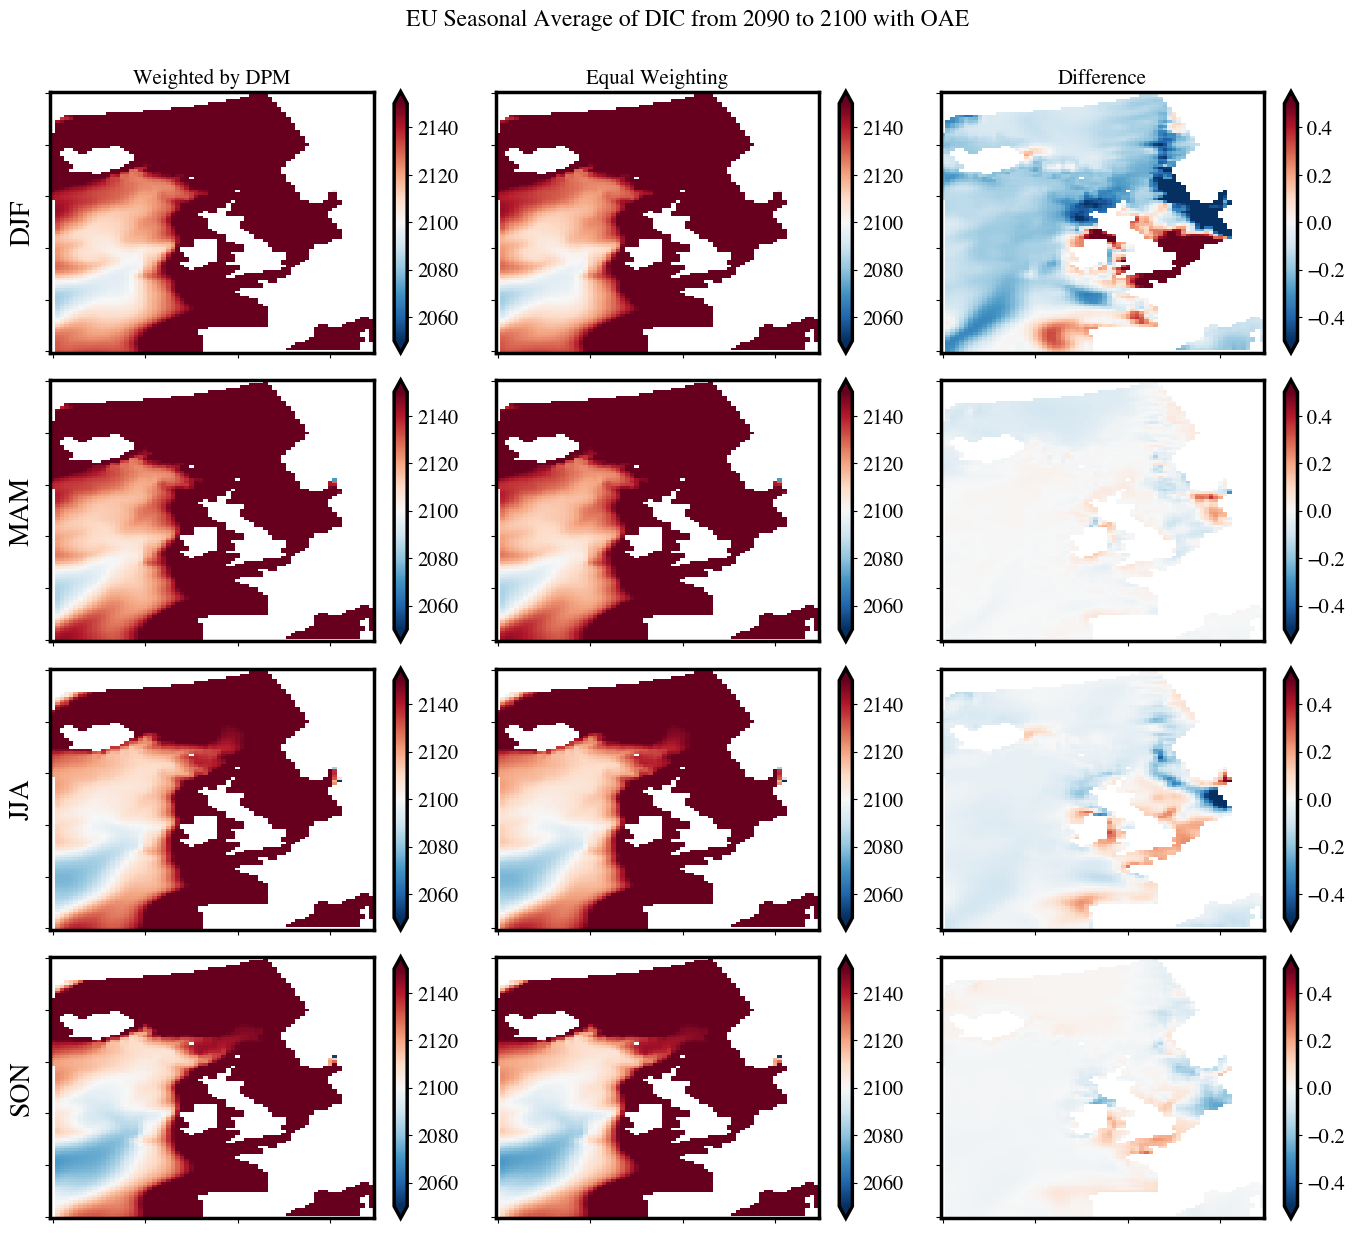

In [44]:
notnull = pd.notnull(ds_unweighted_baseline["dic"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2050,
        vmax=2150,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["dic"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of DIC from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [45]:
dic_monthly_mean_baseline = (data_baseline["DIC"].sel(time_counter=slice(start_date, end_date))).mean(["y", "x", "deptht"])

In [46]:
dic_monthly_mean_oae = (data_oae["DIC"].sel(time_counter=slice(start_date, end_date))).mean(["y", "x", "deptht"])

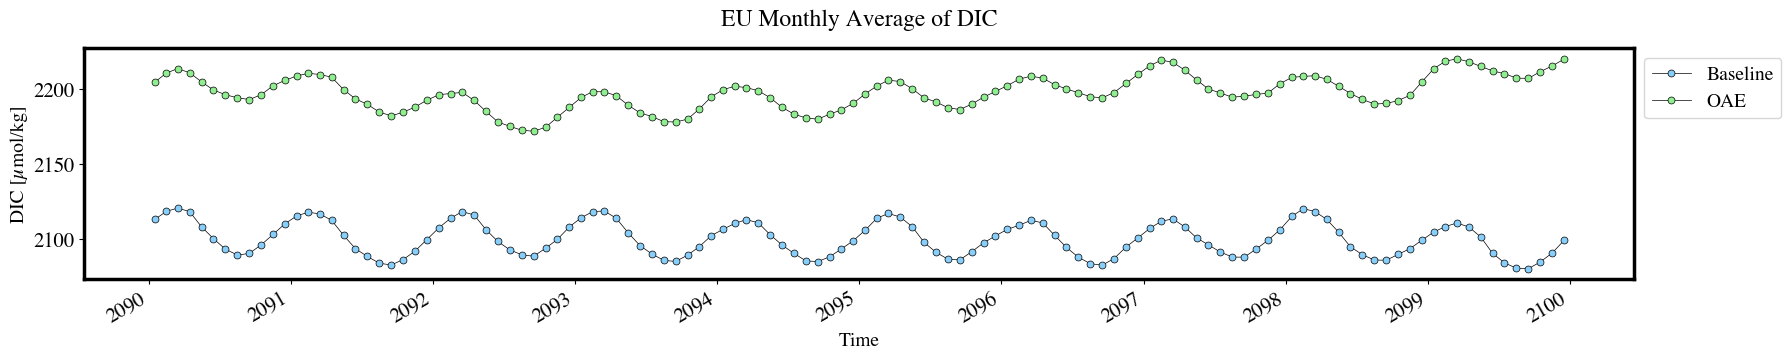

In [47]:
f, ax = plt.subplots(figsize=(20, 3))

dic_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

dic_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of DIC", fontname="Times", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of DIC from 2090 to 2100 without OAE

In [48]:
dic_baseline_monthly = dic_monthly_mean_baseline.to_dataframe('dic')
dic_baseline_monthly['Month'] = pd.DatetimeIndex(dic_baseline_monthly.index).month

In [49]:
# condition

conditions_month = [
    (dic_baseline_monthly['Month'] == 1),
    (dic_baseline_monthly['Month'] == 2),
    (dic_baseline_monthly['Month'] == 3),
    (dic_baseline_monthly['Month'] == 4),
    (dic_baseline_monthly['Month'] == 5),
    (dic_baseline_monthly['Month'] == 6),
    (dic_baseline_monthly['Month'] == 7),
    (dic_baseline_monthly['Month'] == 8),
    (dic_baseline_monthly['Month'] == 9),
    (dic_baseline_monthly['Month'] == 10),
    (dic_baseline_monthly['Month'] == 11),
    (dic_baseline_monthly['Month'] == 12)
]

values_month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [50]:
dic_baseline_monthly['Month'] = np.select(conditions_month, values_month)

In [51]:
# condition

colors_month = dict(zip(dic_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

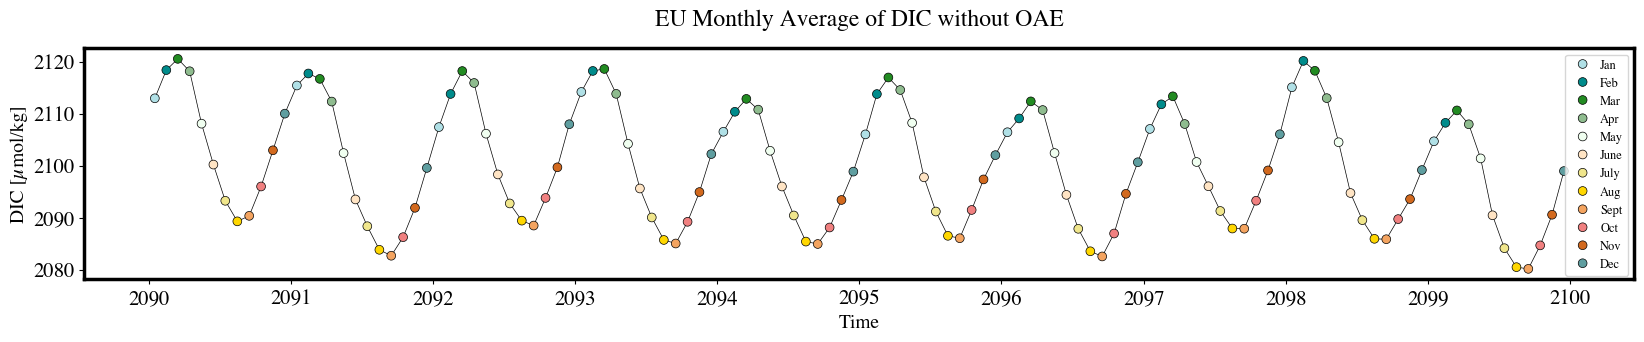

In [52]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.dic, color=dic_baseline_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of DIC without OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC from 2090 to 2100 with OAE

In [53]:
dic_oae_monthly = dic_monthly_mean_oae.to_dataframe('dic')
dic_oae_monthly['Month'] = pd.DatetimeIndex(dic_oae_monthly.index).month

In [54]:
dic_oae_monthly['Month'] = np.select(conditions_month, values_month)

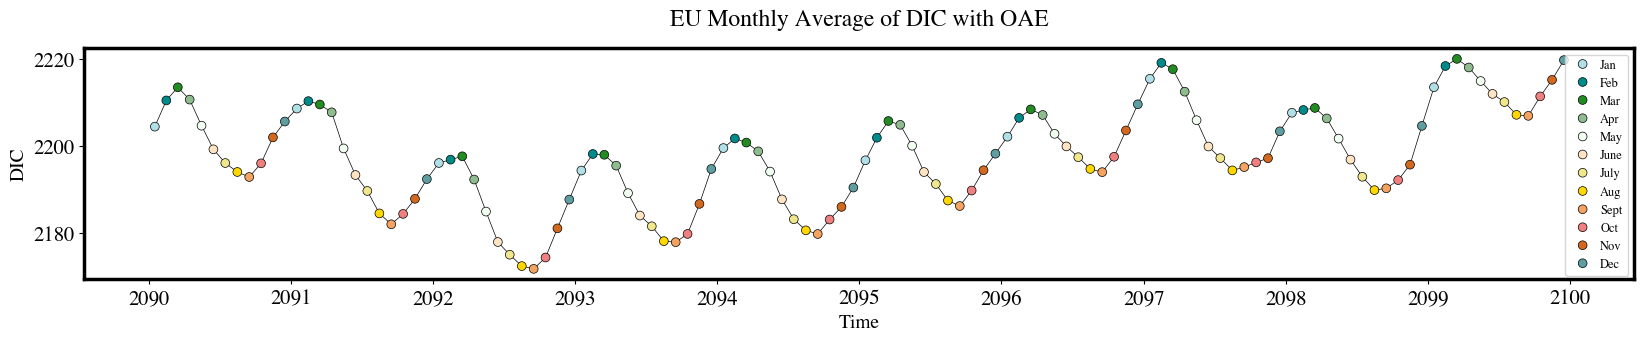

In [55]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.dic, color=dic_oae_monthly.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC', fontsize=14)
ax.set_title("EU Monthly Average of DIC with OAE", fontname="Times", fontsize=17, y=1.06)

pass

### EU Monthly Average of DIC from 2090 to 2100 with and without OAE

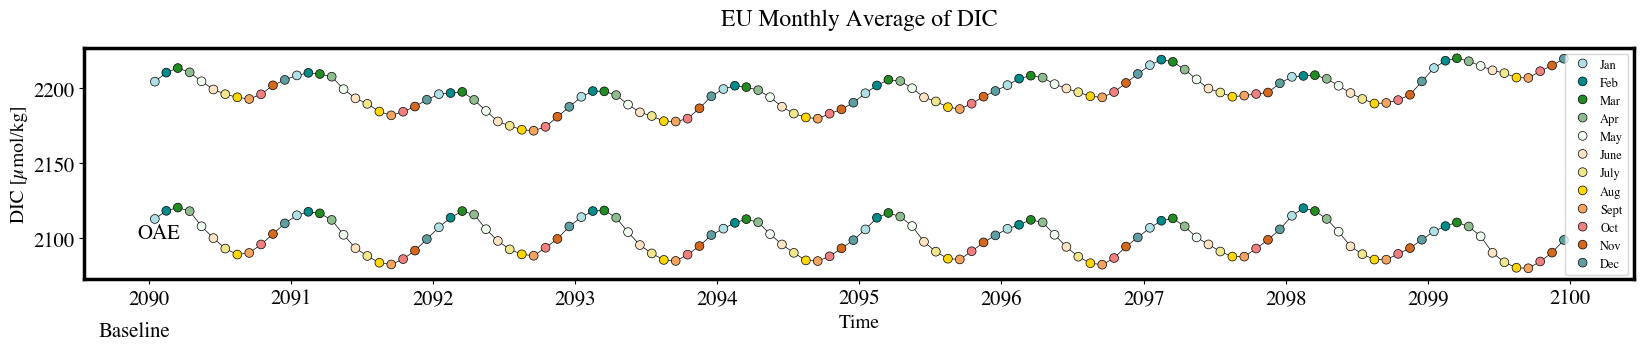

In [56]:
fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2100, s='OAE')
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.dic, color=dic_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43700, 2035, s='Baseline')
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.dic, color=dic_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('DIC [µmol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of DIC", fontsize=17, y=1.06)

pass

In [57]:
mean_baseline = (dic_baseline_monthly.groupby(dic_baseline_monthly.index.month).dic.mean()).reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [58]:
mean_oae = (dic_oae_monthly.groupby(dic_oae_monthly.index.month).dic.mean()).reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [59]:
# condition

colors_time = dict(zip(mean_baseline.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

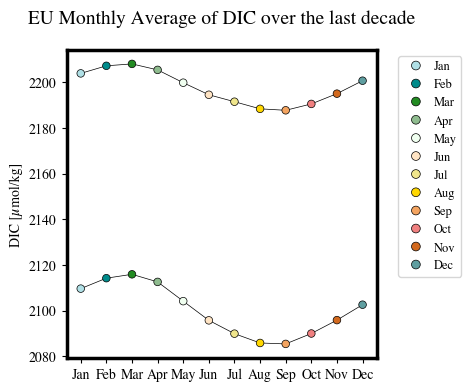

In [60]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(mean_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_baseline.time_counter, mean_baseline.dic, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax.plot(mean_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(mean_oae.time_counter, mean_oae.dic, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.05, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('DIC [µmol/kg]', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.yaxis.get_offset_text().set_fontsize(10)

ax.set_title("EU Monthly Average of DIC over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### Δ DIC between Baseline and OAE

In [61]:
delta_dic = (dic_oae_monthly.dic - dic_baseline_monthly.dic).to_xarray()

In [62]:
delta_dic = delta_dic.to_dataframe('dic')
delta_dic['Month'] = pd.DatetimeIndex(delta_dic.index).month

In [63]:
delta_dic['Month'] = np.select(conditions_month, values_month)

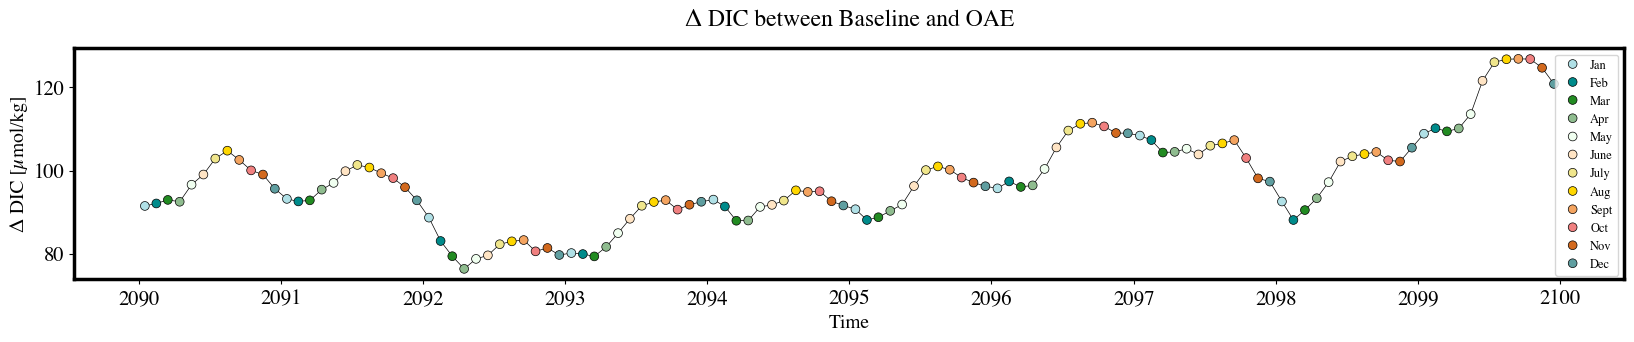

In [64]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_dic.index, delta_dic.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors_month[x]), edgecolors='black',  linewidth=0.5, s=40)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ DIC [µmol/kg]', fontsize=14)
ax.set_title("Δ DIC between Baseline and OAE", fontname="Times", fontsize=17, y=1.06)

pass

### Averaged monthly cycle of Δ DIC

In [65]:
delta_dic_mean = (delta_dic.groupby(delta_dic.index.month).dic.mean()).reset_index()
delta_dic_mean['time_counter'] = delta_dic_mean['time_counter'].apply(lambda x: calendar.month_abbr[x])

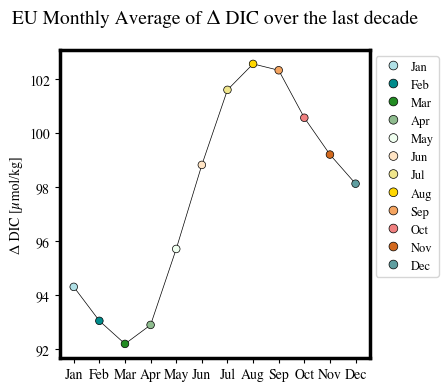

In [66]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(delta_dic_mean.dic, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_dic_mean.time_counter, delta_dic_mean.dic, color=delta_dic_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_time.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.set_ylabel('Δ DIC [µmol/kg]', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title("EU Monthly Average of Δ DIC over the last decade", fontname="Times", fontsize=14, y=1.06)

pass

### EU Monthly Average of Δ DIC (with annual average)

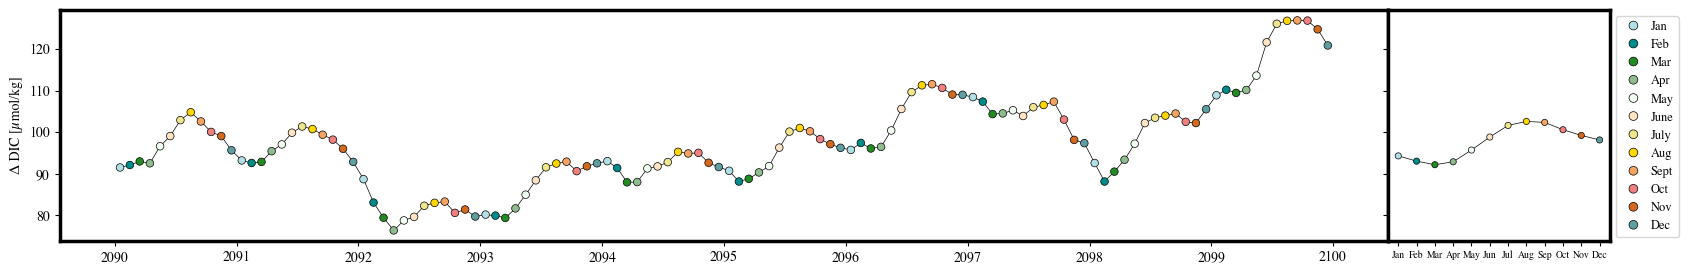

In [67]:
f, (ax, ax2) = plt.subplots(1,2, figsize=(20, 3), gridspec_kw={'width_ratios': [6, 1]}, sharey=True) 
plt.subplots_adjust(wspace=0, hspace=0)


ax.plot_date(delta_dic.index, delta_dic.dic, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax2.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 1, handler_map={mpatches.Circle: HandlerEllipse()})

ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_ylabel('Δ DIC [µmol/kg]', fontsize=10)

ax2.plot(delta_dic_mean.dic, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_dic_mean.time_counter, delta_dic_mean.dic, color=delta_dic_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=20)

ax2.tick_params(axis='x', which='major', labelsize=7)

#plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/DIC/figs/EUDIC_change_monthly_mean.png')

pass

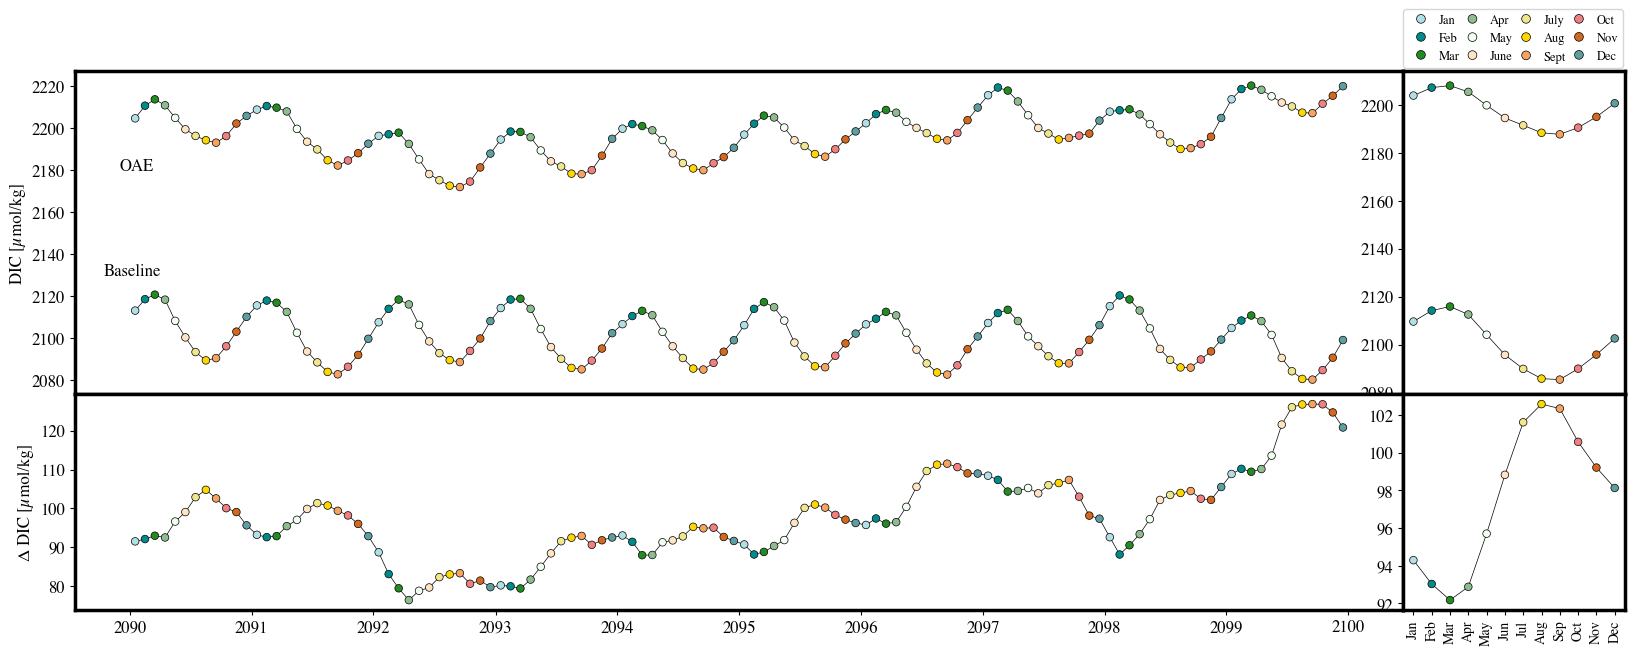

In [75]:
f, ((ax, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20, 7), gridspec_kw={'width_ratios': [6, 1], 'height_ratios': [3, 2]}, sharey=False)  
plt.subplots_adjust(wspace=0, hspace=0)

ax.plot_date(dic_baseline_monthly.index, dic_baseline_monthly.dic, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax.text(43750, 2130, s='Baseline', fontsize=12)
ax.scatter(dic_baseline_monthly.index, dic_baseline_monthly.dic, color=dic_baseline_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.plot_date(dic_oae_monthly.index, dic_oae_monthly.dic, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(43800, 2180, s='OAE', fontsize=12)
ax.scatter(dic_oae_monthly.index, dic_oae_monthly.dic, color=dic_oae_monthly.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_ylabel('DIC [µmol/kg]', fontsize=12)

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month.items()]
ax.legend(handles = legend, bbox_to_anchor=(1.17, 1.21), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=9, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

ax2.plot(mean_baseline.dic, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_baseline.time_counter, mean_baseline.dic, color=mean_baseline.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.plot(mean_oae.dic, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(mean_oae.time_counter, mean_oae.dic, color=mean_oae.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax2.tick_params(axis='x', which='major', labelsize=8)
ax2.tick_params(axis='y', which='major', labelsize=12)

ax3.plot_date(delta_dic.index, delta_dic.dic, '-', label='Baseline', color="black", linewidth=0.5, zorder=0.8)
ax3.scatter(delta_dic.index, delta_dic.dic, color=delta_dic.Month.map(lambda x: colors_month[x]), marker='o', edgecolors='black', linewidth=0.5, s=30)

ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.yaxis.get_offset_text().set_fontsize(12)
ax3.set_ylabel('Δ DIC [µmol/kg]', fontsize=12)

ax4.plot(delta_dic_mean.dic, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_dic_mean.time_counter, delta_dic_mean.dic, color=delta_dic_mean.time_counter.map(lambda x: colors_time[x]), edgecolors='black',  linewidth=0.5, s=30)

ax4.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax4.tick_params(axis='y', which='major', labelsize=12)

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/DIC/figs/EUDIC_monthly_mean.png')

pass

### DIC over Depth

In [69]:
depth_baseline_frame = data_baseline.sel(time_counter=slice('2090', '2100'))
depth_oae_frame = data_oae.sel(time_counter=slice('2090', '2100'))

In [70]:
depth_baseline_frame = depth_baseline_frame.DIC.mean(dim=('y', 'x', 'time_counter'))
depth_oae_frame = depth_oae_frame.DIC.mean(dim=('y', 'x', 'time_counter'))

In [71]:
depth_baseline_frame = depth_baseline_frame.to_dataset()
depth_oae_frame = depth_oae_frame.to_dataset()

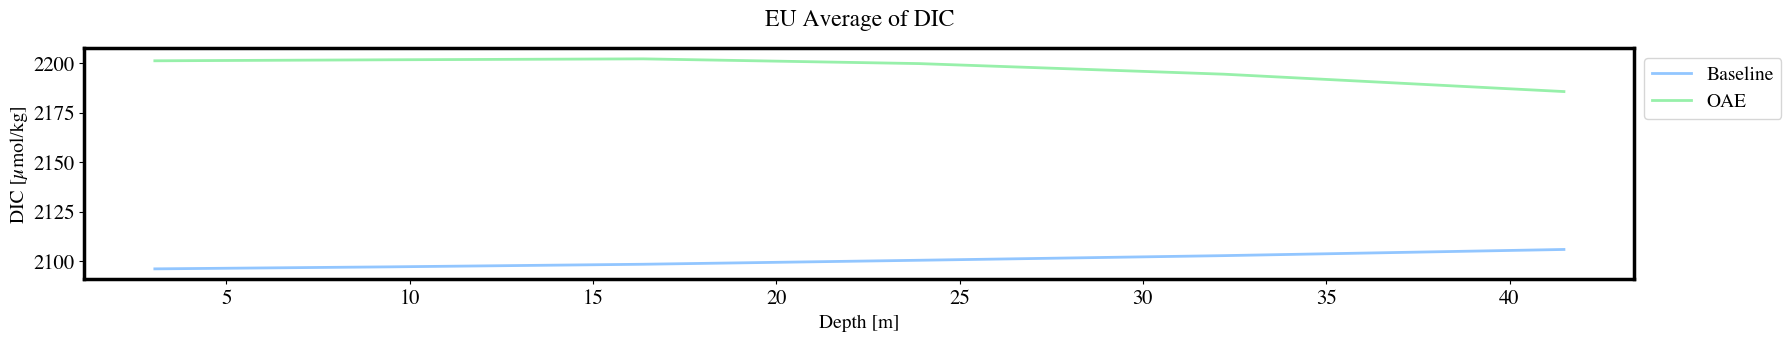

In [72]:
plt.figure(figsize=(20, 3))
plt.plot(depth_baseline_frame.deptht, depth_baseline_frame.DIC, linewidth=2, label = 'Baseline')
plt.plot(depth_oae_frame.deptht, depth_oae_frame.DIC, linewidth=2, label = 'OAE')
plt.xlabel("Depth [m]", fontsize=14)
plt.ylabel("DIC [µmol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Average of DIC', fontsize=17, y=1.06)
plt.show()

In [73]:
summary_amplitude = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_amplitude.csv', header=[0,1], index_col=0)

In [74]:
summary_amplitude.loc['DIC', ('European Average','With OAE')] = round(mean_oae.DIC.max() - mean_oae.DIC.min())

AttributeError: 'DataFrame' object has no attribute 'DIC'

In [ ]:
summary_amplitude.loc['DIC', ('European Average','Without OAE')] = round(mean_baseline.DIC.max() - mean_baseline.DIC.min())

In [ ]:
summary_amplitude.to_csv('../Summary_amplitude.csv')

In [ ]:
summary_maxmin = pd.read_csv(r'/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP3_7.0/Summary_minmax_eu.csv', header=[0,1], index_col=0)

In [ ]:
summary_maxmin.loc['DIC', ('Without OAE','Max')] = round(mean_baseline.DIC.max())
summary_maxmin.loc['DIC', ('Without OAE','Min')] = round(mean_baseline.DIC.min())

In [ ]:
summary_maxmin.loc['DIC', ('With OAE','Max')] = round(mean_oae.DIC.max())
summary_maxmin.loc['DIC', ('With OAE','Min')] = round(mean_oae.DIC.min())

In [ ]:
summary_maxmin.to_csv('../Summary_minmax_eu.csv')